<a href="https://colab.research.google.com/github/Ankit2058/Image-classification/blob/main/Starter_code_for_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #your easy to workwith framework
from torch import nn # i just love neural network due to multiple reason, mainly flexibility
import matplotlib.pyplot as plt #your graph library

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
#Machine learnig primarily contains two jobs within it
#first part is related to data: getting data and transforming it into correct form
#second part is related to creating model best for the given set of data
#lets do the data part first


In [ ]:
#so here is what we are doing we are going to take a input x and
#put it in a fucntion and get the y value
start=0
end=1
step=0.04
weights=5.0
biases=0.8
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weights*X + biases
print(X[:5]), print(Y[:5]),print(X.shape)
print(Y.shape)

tensor([[0.0000],
        [0.0400],
        [0.0800],
        [0.1200],
        [0.1600]])
tensor([[0.8000],
        [1.0000],
        [1.2000],
        [1.4000],
        [1.6000]])
torch.Size([25, 1])
torch.Size([25, 1])


In [ ]:
len(X),len(Y)

(25, 25)

In [ ]:
#Now lets divide the data into training and test sets
#training sets consits of 80% of data while
#test sets consists of 20% of data
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2, random_state=100,shuffle=True)
print(len(train_X)),print(len(train_Y))
print(len(test_Y)),print(len(test_Y))

20
20
5
5


(None, None)

In [ ]:
def plot_data(train_input,train_output,test_input,test_output):
  plt.figure(figsize=(6,6))
  plt.scatter(train_input,train_output,color='b',s=8,label="training_data")
  plt.scatter(test_input,test_output,color='r',s=8,label="testing_data")
  plt.xlabel("input")
  plt.ylabel("output")
  plt.legend()
  plt.show()


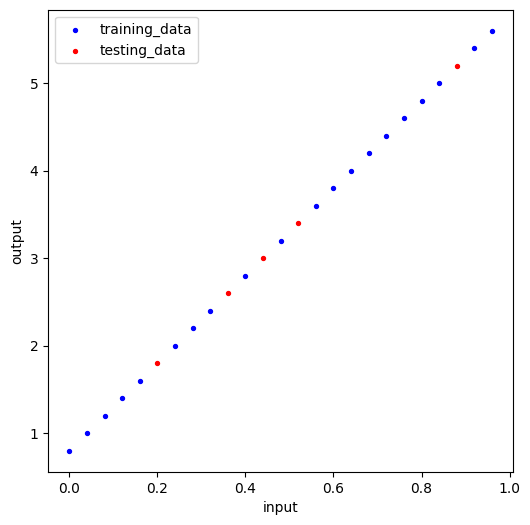

In [ ]:
plot_data(train_X,train_Y,test_X,test_Y)

In [ ]:
#so till now we defined a input and output values just by creating a simple function in between
#and then we divided the data into train and test set which was followed by plotting them in the scatter chart
#now we will be doing something interesting
#opening up to the world of neural network and yes it will be fun
# so the basic strategy up a head will be to define a model which will predict an output when feed with a input
#for now i will define the model as:  output = intput *weight + bias
#here weight and bias value is randomly set and are unknown and its our job to find these values so that our model will predict the
#output in same propostion of input output training set
#How do we do that?
#by teaching our model that is adjusting the weight and biases
#so we know the output of the input and the model will also predict some output
#the idea is to punish the model when it predict this wrong
#this punishment means to adjust the weight and bias of the model
#so think it this way
#A random equation with random prametric value predicting the output
#followed by the calcualtion of loss of the basis of real output
#followed by the tuning of weight and biases

In [ ]:
#first job to attain that is to first define a model and state how input will be transformed to output
#we define model as an object so here comes the object defination i.e class
class fargiModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x):
    return self.weight*x + self.bias
model = fargiModel()
print(model)
model=fargiModel()
print(list(model.parameters()))
#now let me tell you what i did in this part of code
#

fargiModel()
[Parameter containing:
tensor([0.8649], requires_grad=True), Parameter containing:
tensor([0.6586], requires_grad=True)]


In [ ]:
prediction=model.forward(train_X)
print(-1<(prediction-train_Y))

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])


In [ ]:
learning_rate=0.1
epochs=1000
def training_loop(self,epochs,learning_rate,train_X,train_Y):
  optimizer=torch.optim.SGD(self.parameters(),lr=learning_rate)
  loss_fn=nn.MSELoss()
  for epoch in range(epochs):
    y_pred=model.forward(train_X)
    loss=loss_fn(y_pred,train_Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%100==0:
      print(f"epoch:{epoch+1},loss:{loss.item():.4f}")
      print(f"weight:{model.weight.item():.4f},bias:{model.bias.item():.4f}")
training_loop(model,epochs,learning_rate,train_X,train_Y)

epoch:1,loss:0.0000
weight:0.5000,bias:0.8000
epoch:101,loss:0.0000
weight:0.5000,bias:0.8000
epoch:201,loss:0.0000
weight:0.5000,bias:0.8000
epoch:301,loss:0.0000
weight:0.5000,bias:0.8000
epoch:401,loss:0.0000
weight:0.5000,bias:0.8000
epoch:501,loss:0.0000
weight:0.5000,bias:0.8000
epoch:601,loss:0.0000
weight:0.5000,bias:0.8000
epoch:701,loss:0.0000
weight:0.5000,bias:0.8000
epoch:801,loss:0.0000
weight:0.5000,bias:0.8000
epoch:901,loss:0.0000
weight:0.5000,bias:0.8000


In [ ]:
prediction=model.weight.item()*train_X + model.bias.item()
print(train_Y-prediction<0.00005)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [ ]:
#it turns out that we did good job on the part of making our first model but as it alwasys happens with the start
#i didnt see the small nuances of mistakes that i have done, so it seem quite enjoyble to report the misketake
# mistake01) i took train data to calculate my accuracy which was one of my metric
#which means i tested the model upon the data i trained it on
# mistake02) i didnt dropped the regulaizations during the testing, for now i am not using regularizations like dropout but later i will
#so i am supposed to drop such regularization during the testing time
#overall its quite a nice start
# i guess i will be in this basic model building to level of excellence where i can create my own data sets and convert it into the tensors and
#load it into my model then train it and generate outputs. I will take this month, maybe some 17 18 days
# in between i am supposed to collect the banana dataset and experinment on that
#let me do my planning right here
#i see my courses running parallely and
#papers being read regularly
#and a hour will be given in the morning for last course of coursera
#so i see myself being able to navigate all throught the relam of machine learining implementationa and its research along with
#good grounds on courses and finally an complete certificate on deep learning specialization

In [ ]:
plt.plot(np.linspace(0,70,100).reshape(-1,1),model.predict

In [ ]:
plt.plot(np.linspace(0,70,100).reshape(-1,1),model.predict